In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the configuration of the plots (size)

In [141]:
movies=pd.read_csv('/Users/wojtekmarszalek/Desktop/movies.csv')
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [142]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [143]:
movies['rating'].fillna('Unknown',inplace=True)
movies['released'].fillna('Unknown',inplace=True)

In [144]:
for col in movies.columns:
    if movies[col].dtype=='0':
        movies[col].fillna('Unknown',inplace=True)
    else:
        movies[col].fillna(0,inplace=True)

In [145]:
movies['budget']=movies['budget'].astype('int')

In [146]:
movies['gross']=movies['gross'].astype('int')

In [147]:
movies['runtime']=movies['runtime'].astype('int')

In [148]:
movies['votes']=movies['votes'].astype('int')

In [149]:
movies.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100


In [150]:
movies.rename(columns={'gross':'gross_revenue'},inplace=True)

In [151]:
movies.rename(columns={'runtime':'runtime_minutes', 'released':'released_date'},inplace=True)

In [152]:
movies.sort_values(by='gross_revenue',ascending=False,inplace=True)

In [153]:
movies.head()

,name,rating,genre,year,released_date,score,votes,director,writer,star,country,budget,gross_revenue,company,runtime_minutes
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [154]:
movies.drop_duplicates(inplace=True)

In [155]:
movies

,name,rating,genre,year,released_date,score,votes,director,writer,star,country,budget,gross_revenue,company,runtime_minutes
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89
1601,My Twentieth Century,Unknown,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104


<function matplotlib.pyplot.show(close=None, block=None)>

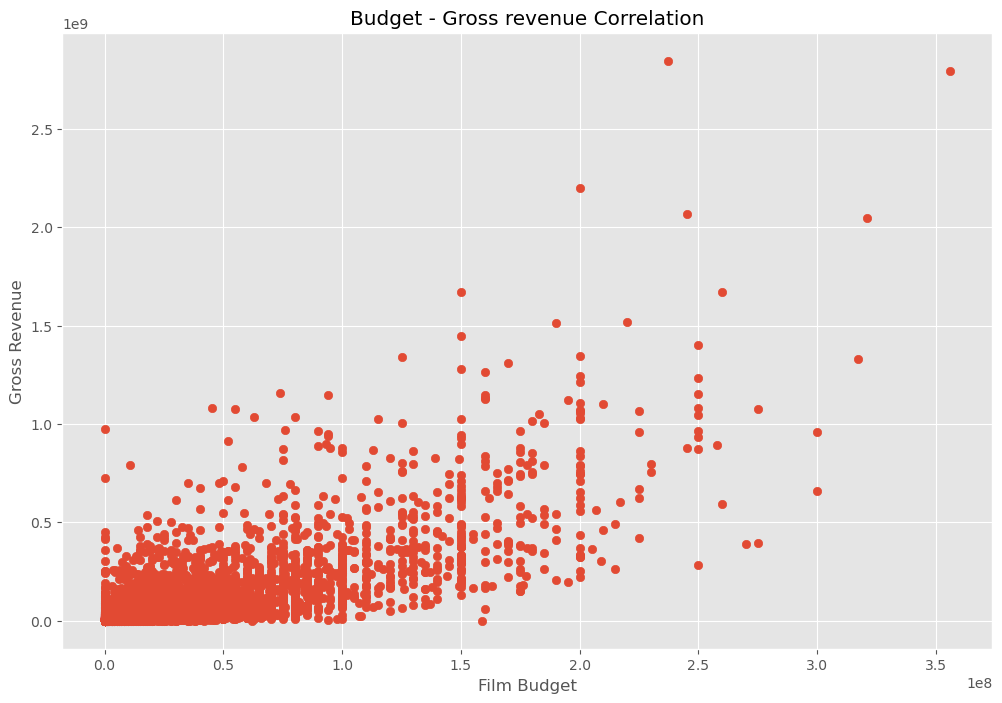

In [156]:
plt.scatter(x=movies['budget'],y=movies['gross_revenue'])
plt.title('Budget - Gross revenue Correlation')
plt.xlabel('Film Budget')
plt.ylabel('Gross Revenue')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross_revenue'>

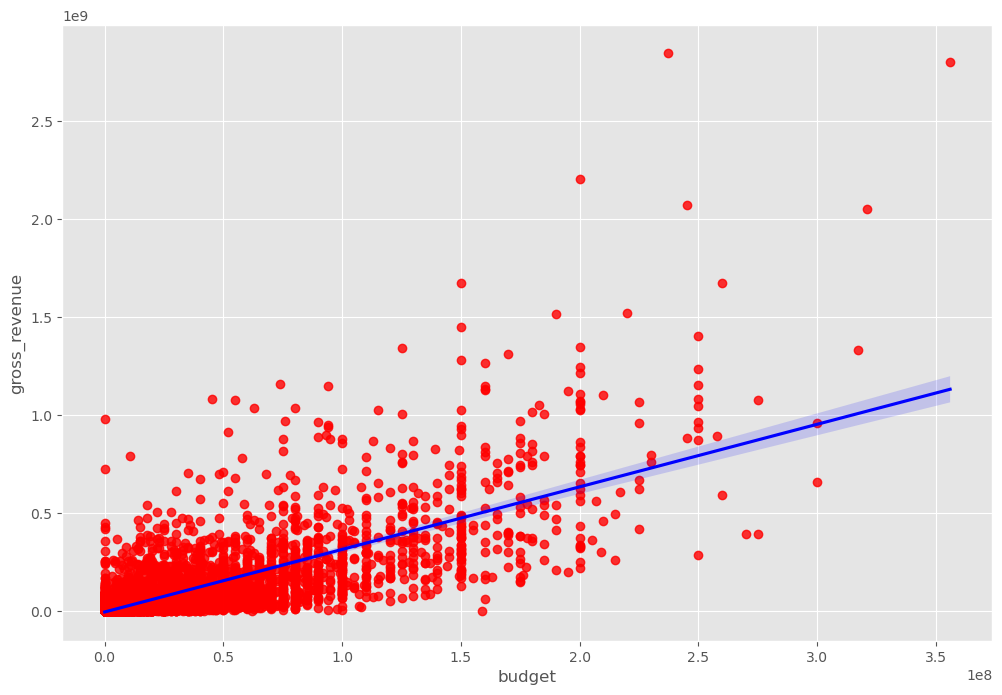

In [157]:
# regression chart, scatter_kws->color of dots, line_kws-> color of line
sns.regplot(x='budget',y='gross_revenue',data=movies, scatter_kws={"color":"red"}, line_kws={'color':"blue"})

In [158]:
# correlations between numerical fileds
# correlations -> Pearson, kendall, spearmman
movies.corr(method='pearson')

,year,score,votes,budget,gross_revenue,runtime_minutes
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross_revenue,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime_minutes,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


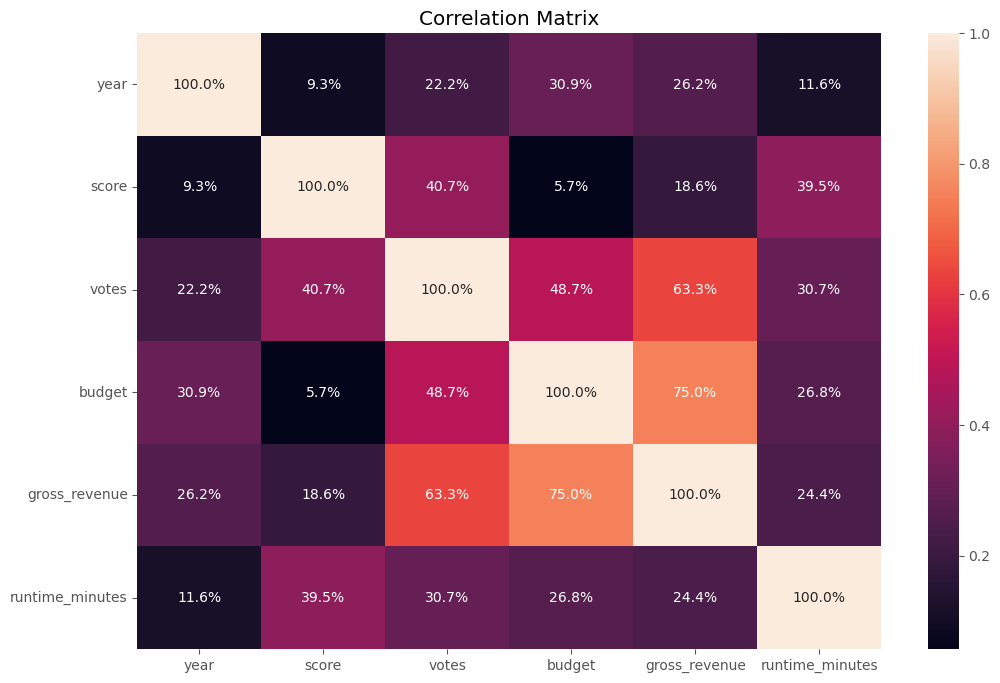

In [159]:
# annot -> parameter for data labels in every square
correlation_martix=movies.corr(method='pearson')

sns.heatmap(correlation_martix,annot=True, fmt=".1%" )

plt.title('Correlation Matrix')

plt.show()

In [160]:
movies_numerized=movies.copy()

In [161]:
movies_numerized.head()

,name,rating,genre,year,released_date,score,votes,director,writer,star,country,budget,gross_revenue,company,runtime_minutes
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [162]:
for col in movies_numerized.columns:
    if (movies_numerized[col]=='object'):
        movies_numerized[col]=movies[col].astype('category')
        movies_numerized[col]=movies_numerized[col].cat.codes
        
movies_numerized

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [167]:
movies_numerized['name']=movies_numerized['name'].astype('category')
movies_numerized['name']=movies_numerized['name'].cat.codes

In [171]:
movies_numerized['rating']=movies_numerized['rating'].astype('category')
movies_numerized['rating']=movies_numerized['rating'].cat.codes
movies_numerized['director']=movies_numerized['director'].astype('category')
movies_numerized['director']=movies_numerized['director'].cat.codes
movies_numerized['writer']=movies_numerized['writer'].astype('category')
movies_numerized['writer']=movies_numerized['writer'].cat.codes
movies_numerized['star']=movies_numerized['star'].astype('category')
movies_numerized['star']=movies_numerized['star'].cat.codes
movies_numerized['company']=movies_numerized['company'].astype('category')
movies_numerized['company']=movies_numerized['company'].cat.codes

In [173]:
movies_numerized['country']=movies_numerized['country'].astype('category')
movies_numerized['country']=movies_numerized['country'].cat.codes

In [174]:
movies_numerized

,name,rating,genre,year,released_date,score,votes,director,writer,star,country,budget,gross_revenue,company,runtime_minutes
5445,533,533,Action,2009,"December 18, 2009 (United States)",7.8,1100000,533,1779,2335,56,237000000,2847246203,2254,162
7445,535,535,Action,2019,"April 26, 2019 (United States)",8.4,903000,535,744,2242,56,356000000,2797501328,1607,181
3045,6896,6896,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,6896,1779,1596,56,200000000,2201647264,2254,194
6663,5144,5144,Action,2015,"December 18, 2015 (United States)",7.8,876000,5144,2551,525,56,245000000,2069521700,1541,138
7244,536,536,Action,2018,"April 27, 2018 (United States)",8.4,897000,536,744,2242,56,321000000,2048359754,1607,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,3712,Crime,1989,"January 26, 1990 (United States)",4.5,274,3712,83,2798,56,0,0,1160,92
1614,1745,1745,Horror,1989,"April 14, 1989 (United States)",5.2,1300,1745,1744,167,55,0,0,147,85
1606,2691,2691,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,2691,947,1196,7,0,0,2238,89
1601,3836,3836,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,3836,1697,682,19,0,0,505,104


In [165]:
movies.head()

,name,rating,genre,year,released_date,score,votes,director,writer,star,country,budget,gross_revenue,company,runtime_minutes
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


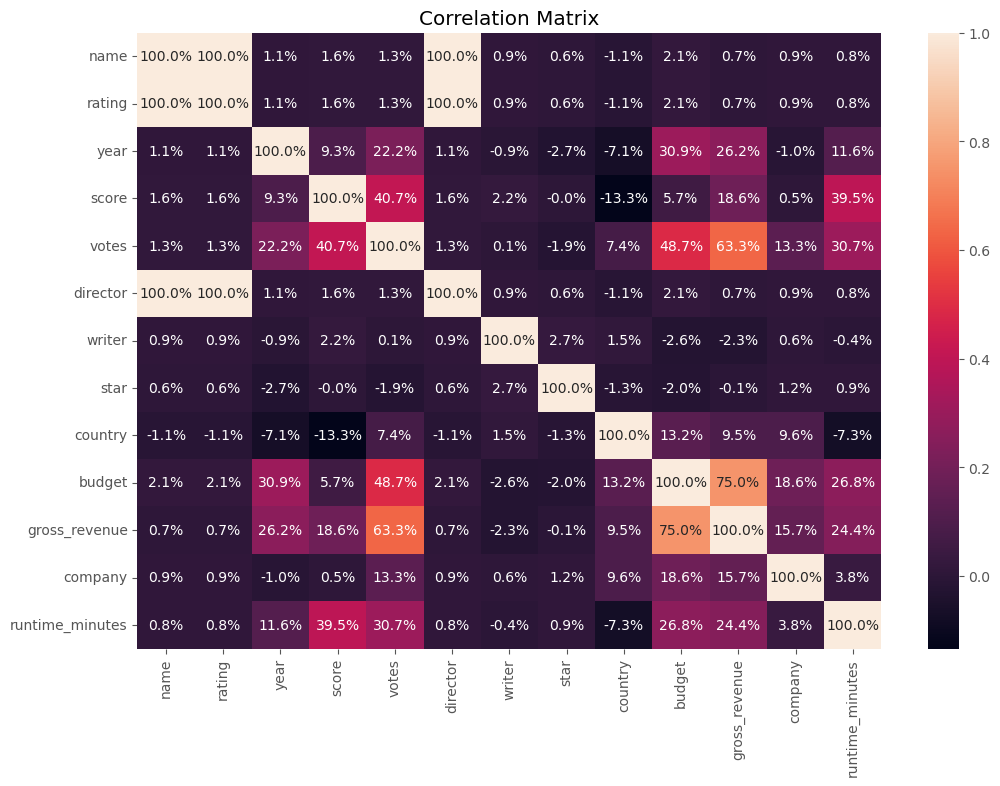

In [175]:
# annot -> parameter for data labels in every square
correlation_martix=movies_numerized.corr(method='pearson')

sns.heatmap(correlation_martix,annot=True, fmt=".1%" )

plt.title('Correlation Matrix')

plt.show()

In [177]:
movies_numerized.corr()

,name,rating,year,score,votes,director,writer,star,country,budget,gross_revenue,company,runtime_minutes
name,1.000000,1.000000,0.011453,0.016377,0.013038,1.000000,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
rating,1.000000,1.000000,0.011453,0.016377,0.013038,1.000000,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
year,0.011453,0.011453,1.000000,0.092616,0.222427,0.011453,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358
score,0.016377,0.016377,0.092616,1.000000,0.407101,0.016377,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564
votes,0.013038,0.013038,0.222427,0.407101,1.000000,0.013038,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984
director,1.000000,1.000000,0.011453,0.016377,0.013038,1.000000,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
writer,0.009081,0.009081,-0.008656,0.022098,0.001127,0.009081,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036
star,0.006472,0.006472,-0.027242,-0.000026,-0.019146,0.006472,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418
country,-0.010737,-0.010737,-0.070938,-0.133346,0.073525,-0.010737,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.073319
budget,0.020548,0.020548,0.309212,0.056863,0.486931,0.020548,-0.025911,-0.019952,0.131720,1.000000,0.750157,0.186474,0.268372


In [180]:
correlation_mat=movies_numerized.corr()

corr_pairs=correlation_mat.unstack()

corr_pairs

name             name               1.000000
                 rating             1.000000
                 year               0.011453
                 score              0.016377
                 votes              0.013038
                                      ...   
runtime_minutes  country           -0.073319
                 budget             0.268372
                 gross_revenue      0.244339
                 company            0.037537
                 runtime_minutes    1.000000
Length: 169, dtype: float64

In [185]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs[sorted_pairs>0.5]

votes            gross_revenue      0.632870
gross_revenue    votes              0.632870
budget           gross_revenue      0.750157
gross_revenue    budget             0.750157
company          company            1.000000
name             name               1.000000
writer           writer             1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
director         director           1.000000
                 rating             1.000000
                 name               1.000000
votes            votes              1.000000
score            score              1.000000
year             year               1.000000
rating           director           1.000000
                 rating             1.000000
                 name               1.000000
name             director           1.000000
                 rating             1.000000
gross_revenue    gross_revenue      1.000000
runtime_mi